# Pre-Processing 

## Importing Libraries

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')

## Grayscale

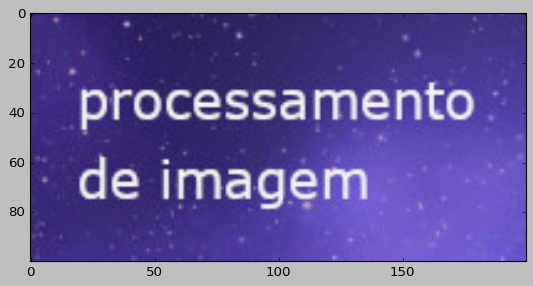

In [45]:
img = cv2.imread('Sources/Images/img-process.jpg')
plt.imshow(img)

In [46]:
img.shape

(100, 200, 3)

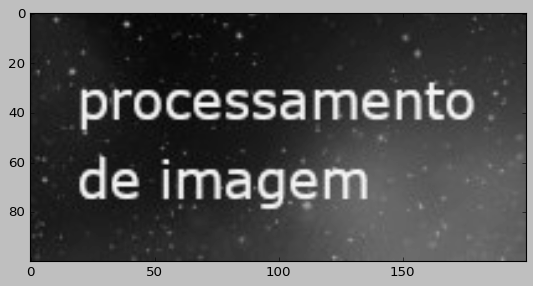

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [35]:
gray.shape

(100, 200)

## Thresholding

### Simple thresholding

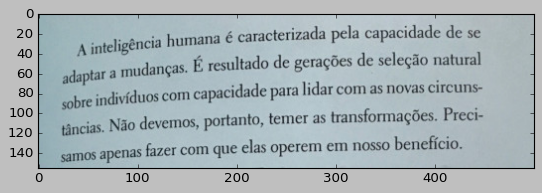

In [36]:
img = cv2.imread('Sources/Images/page-book.jpg')
plt.imshow(img)

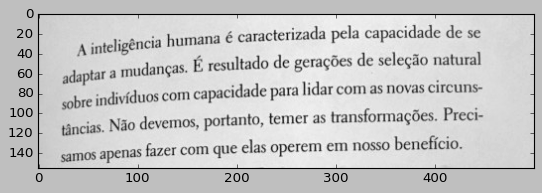

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

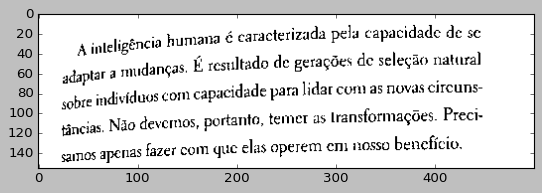

In [43]:
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [39]:
value

127.0